In [245]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 150)
%matplotlib inline

In [255]:
df = pd.read_csv('https://www1.nyc.gov/assets/nypd/downloads/zip/analysis_and_planning/stop-question-frisk/sqf-2014-csv.zip', compression='zip', na_values=[' ','**'])
df = df.drop(['premtype','zip','rescode','aptnum','state'],axis=1)
df['age'].fillna(df['age'].mean(),inplace=True)
df = df[df['age']<100]

In [140]:
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,forceuse,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,premname,addrnum,stname,stinter,crossst,city,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM
0,2014,67,15,1012014,2330,1,O,P,1.0,FEL,5.0,V,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,186,186,N,N,NaN,S,NaN,M,B,12311900,18.0,5,7,150,BK,BR,M,NaN,L,NaN,NaN,NaN,CHURCH AVENUE,EAST 39 STREET,BROOKLYN,67,G,NaN,NaN,1000633.0,176542.0,CM,1,20
1,2014,7,26,1032014,1530,1,I,T,2.0,CRIMINAL MISCHIEF,5.0,P,Y,N,Y,PL 170.25,N,NaN,0,0,N,NaN,Y,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,863,863,N,N,V,S,OT,M,B,12311900,31.0,5,7,160,BK,BR,M,NaN,L,MEZZANINE (POST 0431),NaN,NaN,ESSEX STREET,DELANCEY STREET,MANHATTAN,7,B,2.0,NaN,987521.0,201066.0,CM,1,23
2,2014,84,52,1042014,2100,A,I,P,1.0,GRAND LARCENY (FEL),10.0,P,Y,Y,N,NaN,N,NaN,0,0,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,84,84,Y,N,V,S,NaN,M,B,12311900,16.0,5,8,160,BK,BR,T,NaN,L,HOTEL,224,DUFFIELD STREET,FULTON STREET,WILLOUGHBY STREET,BROOKLYN,84,F,NaN,NaN,988579.0,191174.0,CM,1,45
3,2014,84,13,1092014,1250,1,I,H,1.0,CRIM TRESPASS,5.0,P,Y,Y,N,NaN,N,NaN,0,0,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,84,84,Y,N,NaN,NaN,NaN,M,A,12311900,19.0,5,7,150,BK,BR,Z,SMALL,L,LOBBY,190,YORK STREET,GOLD STREET,BRIDGE STREET,BROOKLYN,84,D,NaN,NaN,988827.0,194808.0,CM,1,31
4,2014,77,19,1092014,1310,1,I,P,1.0,FEL,2.0,P,Y,N,N,NaN,N,NaN,0,0,N,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,187,187,N,N,V,S,NaN,M,B,12311900,32.0,5,10,200,BK,BR,U,NaN,L,STREET,NaN,NaN,RALPH AVENUE,BERGEN STREET,BROOKLYN,77,J,1.0,NaN,1005873.0,185052.0,CM,1,46


In [141]:
df['frisked'].unique()

array(['Y', 'N'], dtype=object)

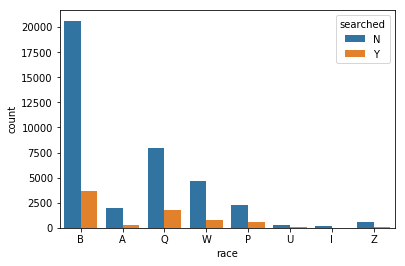

In [82]:
sns.countplot(x='race',hue='searched',data=df,hue_order=["N","Y"])

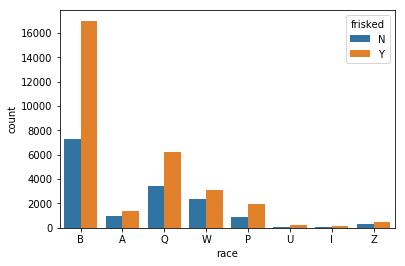

In [77]:
sns.countplot(x='race',hue='frisked',data=df,hue_order=["N","Y"])

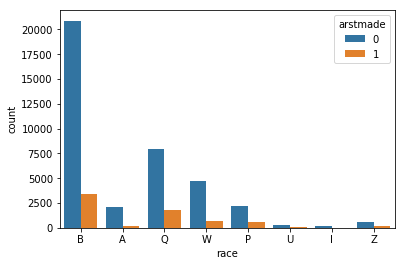

In [78]:
sns.countplot(x='race',hue='arstmade',data=df)

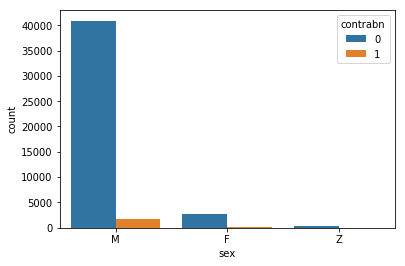

In [144]:
sns.countplot(x='sex',hue='contrabn',data=df)

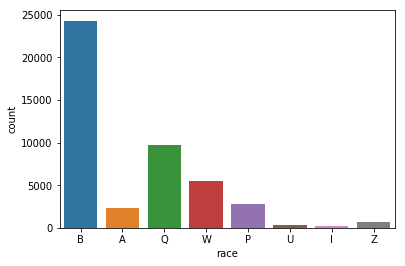

In [60]:
sns.countplot(df.race)

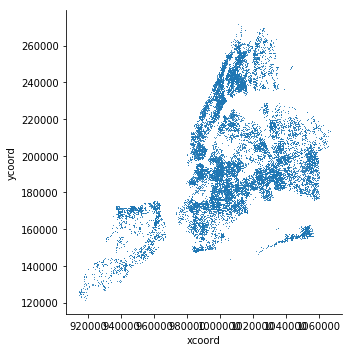

In [121]:
sns.relplot(x='xcoord',y='ycoord',data=df,s=1,linewidth=0)

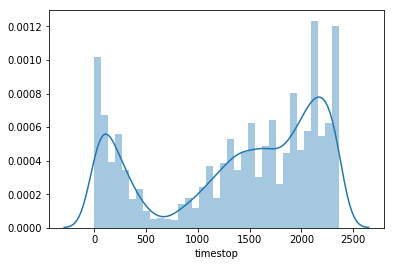

In [68]:
sns.distplot(df.timestop)

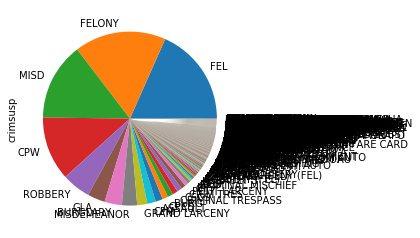

In [109]:
df.crimsusp.value_counts().plot(kind='pie')

In [162]:
pd.get_dummies(df.city).head()

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [128]:
na_values = df.isnull().sum().sort_values(ascending=False)
na_values[na_values>0]

premtype    45787
zip         45787
rescode     45787
aptnum      45787
state       45787
othfeatr    44917
officrid    44898
sumoffen    44577
post        41852
arstoffn    38891
forceuse    36130
beat        32141
offverb     31212
addrnum     27054
stname      26712
offshld     25009
adtlrept    10860
machgun     10860
asltweap    10859
riflshot    10859
pf_pepsp    10857
pf_baton    10856
pf_other    10813
pistol      10806
pf_ptwep    10780
sb_admis    10771
othrweap    10771
pf_drwep    10770
sb_outln    10761
pf_grnd     10742
            ...  
sb_other     9981
ac_assoc     9972
rf_vcact     9894
rf_othsw     9776
pf_hcuff     9714
cs_vcrim     9709
rf_rfcmp     9475
ac_inves     9355
cs_lkout     9348
pf_hands     9133
ac_evasv     8553
rf_vcrim     8325
ac_rept      8272
cs_other     8065
ac_cgdir     8043
cs_casng     8026
ac_proxm     7566
cs_descr     7509
rf_furt      6880
ac_time      6807
cs_furtv     6479
ac_incid     5223
premname     4003
xcoord       1650
ycoord    

In [257]:
#encode all Y/N columns as 1s and 0s
encoder = LabelEncoder()
encoder.fit(["N","Y"])
yncols = [x for x in df.columns if (df.at[0,x] == "Y") | (df.at[0,x] == "N")]
for col in yncols:
    df[col].fillna("N",inplace=True)
    df[col].replace('1',"Y", inplace=True)
    df[col].replace('0',"N",inplace=True)
    df[col] = encoder.transform(df[col])
#encode sex column 
sex_encoder = LabelEncoder()
sex_encoder.fit(["M","F","Z"])
df['sex'] = sex_encoder.transform(df['sex'])
#create combined height column
df['height'] = df['ht_inch'].add(df['ht_feet']*12)
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,forceuse,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,premname,addrnum,stname,stinter,crossst,city,addrpct,sector,beat,post,xcoord,ycoord,dettypCM,lineCM,detailCM,height
0,2014,67,15,1012014,2330,1,O,P,1.0,FEL,5.0,V,1,1,0,NaN,0,NaN,0,0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,186,186,0,0,NaN,S,NaN,1,B,12311900,18.0,5,7,150,BK,BR,M,NaN,L,NaN,NaN,NaN,CHURCH AVENUE,EAST 39 STREET,BROOKLYN,67,G,NaN,NaN,1000633.0,176542.0,CM,1,20,67
1,2014,7,26,1032014,1530,1,I,T,2.0,CRIMINAL MISCHIEF,5.0,P,1,0,1,PL 170.25,0,NaN,0,0,0,NaN,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,863,863,0,0,V,S,OT,1,B,12311900,31.0,5,7,160,BK,BR,M,NaN,L,MEZZANINE (POST 0431),NaN,NaN,ESSEX STREET,DELANCEY STREET,MANHATTAN,7,B,2.0,NaN,987521.0,201066.0,CM,1,23,67
2,2014,84,52,1042014,2100,A,I,P,1.0,GRAND LARCENY (FEL),10.0,P,1,1,0,NaN,0,NaN,0,0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,84,84,1,0,V,S,NaN,1,B,12311900,16.0,5,8,160,BK,BR,T,NaN,L,HOTEL,224,DUFFIELD STREET,FULTON STREET,WILLOUGHBY STREET,BROOKLYN,84,F,NaN,NaN,988579.0,191174.0,CM,1,45,68
3,2014,84,13,1092014,1250,1,I,H,1.0,CRIM TRESPASS,5.0,P,1,1,0,NaN,0,NaN,0,0,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,84,84,1,0,NaN,NaN,NaN,1,A,12311900,19.0,5,7,150,BK,BR,Z,SMALL,L,LOBBY,190,YORK STREET,GOLD STREET,BRIDGE STREET,BROOKLYN,84,D,NaN,NaN,988827.0,194808.0,CM,1,31,67
4,2014,77,19,1092014,1310,1,I,P,1.0,FEL,2.0,P,1,0,0,NaN,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,187,187,0,0,V,S,NaN,1,B,12311900,32.0,5,10,200,BK,BR,U,NaN,L,STREET,NaN,NaN,RALPH AVENUE,BERGEN STREET,BROOKLYN,77,J,1.0,NaN,1005873.0,185052.0,CM,1,46,70


In [268]:
#build training set
X = df.loc[:,'contrabn':'othrweap']
X = pd.concat([X,df[['weight','age','height']]],axis="columns")

categorical_features = ['city','build','race']

#concatenate all
X = pd.concat([X,df[categorical_features]],axis="columns")

X = pd.get_dummies(X)
X.head(20)

,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,weight,age,height,city_BRONX,city_BROOKLYN,city_MANHATTAN,city_QUEENS,city_STATEN ISLAND,build_H,build_M,build_T,build_U,build_Z,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z
0,0,0,0,0,0,0,0,0,150,18.0,67,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,160,31.0,67,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,160,16.0,68,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,150,19.0,67,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,200,32.0,70,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,160,22.0,69,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,180,32.0,72,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,160,49.0,67,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,190,24.0,69,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,160,41.0,70,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [269]:
#build
df['frisked'].replace(1,"Y",inplace=True)
df['frisked'].replace(0,"N",inplace=True)
y = encoder.transform(df['frisked'])

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct = ColumnTransformer([('scaler', StandardScaler(), ['weight','height','age'])], remainder='passthrough')
#scale quantitative variables to z scores
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

C:\Users\seyon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\seyon\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\seyon\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [273]:
#fit logistic regression
clf = LogisticRegression(random_state=0, solver='saga',max_iter=1000).fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [274]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.56      0.11      0.18      3039
           1       0.68      0.96      0.80      6110

   micro avg       0.68      0.68      0.68      9149
   macro avg       0.62      0.53      0.49      9149
weighted avg       0.64      0.68      0.59      9149



In [275]:
pd.DataFrame(confusion_matrix(y_test,pred_clf),index=[1,0],columns=[1,0])

,1,0
1,336,2703
0,263,5847


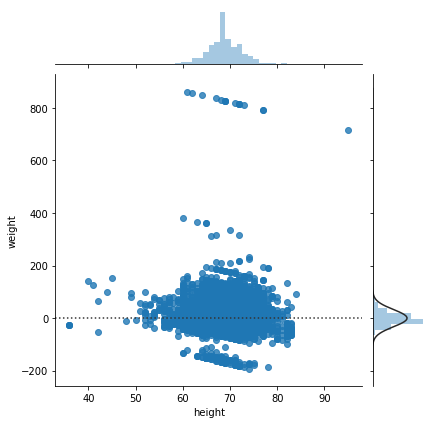